In [28]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [29]:
df=pd.read_csv("Covid19 India (Jan 20 - Mar 20).csv",sep=";")
print(df.head())
print(df.info())

  Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0                        1,30-01-2020,Kerala,1,0,0,0                                         
1                        2,31-01-2020,Kerala,1,0,0,0                                         
2                        3,01-02-2020,Kerala,2,0,0,0                                         
3                        4,02-02-2020,Kerala,3,0,0,0                                         
4                        5,03-02-2020,Kerala,3,0,0,0                                         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 1 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,

In [30]:
import pandas as pd
df = pd.read_csv("Covid19 India (Jan 20 - Mar 20).csv", sep=";")
print("Original DataFrame:")
print(df.head())
print(df.info())
df[['Sno', 'Date', 'State', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths']] = df['Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths'].str.split(',', expand=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
numeric_cols = ['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
print("\nCleaned DataFrame:")
print(df.head())
print(df.info())


Original DataFrame:
  Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths
0                        1,30-01-2020,Kerala,1,0,0,0                                         
1                        2,31-01-2020,Kerala,1,0,0,0                                         
2                        3,01-02-2020,Kerala,2,0,0,0                                         
3                        4,02-02-2020,Kerala,3,0,0,0                                         
4                        5,03-02-2020,Kerala,3,0,0,0                                         
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 1 columns):
 #   Column                                                                                       Non-Null Count  Dtype 
---  ------                                                                                       --------------  ----- 
 0   Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedFo


Missing Values:
Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths    0
Sno                                                                                            0
Date                                                                                           0
State                                                                                          0
ConfirmedIndianNational                                                                        0
ConfirmedForeignNational                                                                       0
Cured                                                                                          0
Deaths                                                                                         0
dtype: int64


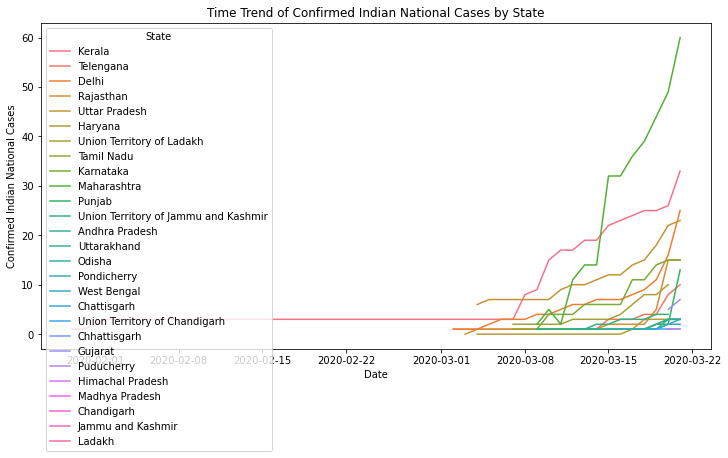


Cleaned DataFrame:
  Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths  \
0                        1,30-01-2020,Kerala,1,0,0,0                                            
1                        2,31-01-2020,Kerala,1,0,0,0                                            
2                        3,01-02-2020,Kerala,2,0,0,0                                            
3                        4,02-02-2020,Kerala,3,0,0,0                                            
4                        5,03-02-2020,Kerala,3,0,0,0                                            

   Sno       Date   State  ConfirmedIndianNational  ConfirmedForeignNational  \
0    1 2020-01-30  Kerala                        1                         0   
1    2 2020-01-31  Kerala                        1                         0   
2    3 2020-02-01  Kerala                        2                         0   
3    4 2020-02-02  Kerala                        3                         0 

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Covid19 India (Jan 20 - Mar 20).csv", sep=";")
df[['Sno', 'Date', 'State', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths']] = df['Sno,Date,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths'].str.split(',', expand=True)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
numeric_cols = ['Sno', 'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured', 'Deaths']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')
missing_values = df.isnull().sum()
print("\nMissing Values:")
print(missing_values)
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='ConfirmedIndianNational', data=df, hue='State')
plt.title('Time Trend of Confirmed Indian National Cases by State')
plt.xlabel('Date')
plt.ylabel('Confirmed Indian National Cases')
plt.show()
print("\nCleaned DataFrame:")
print(df.head())
print(df.info())


In [42]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [43]:

x=df.iloc[:,0:6]
y=df.iloc[:,6:7]

In [52]:
mlr=LinearRegression()
mlr.fit(x,y)
mlr_pred=mlr.predict(x)

dt=DecisionTreeRegressor()
dt.fit(x,y)
dt_pred=dt.predict(x)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x,y)
rf_pred=rf.predict(x)

ValueError: could not convert string to float: '1,30-01-2020,Kerala,1,0,0,0'

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mlr:","r2:",r2_score(y,mlr_pred),"mae:",mean_absolute_error(y,mlr_pred))
print("dt:","r2:",r2_score(y,dt_pred),"mae:",mean_absolute_error(y,dt_pred))
print("rf:","r2:",r2_score(y,rf_pred),"mae:",mean_absolute_error(y,rf_pred))

NameError: name 'mlr_pred' is not defined

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=42)


mlr=LinearRegression()
mlr.fit(x_train,y_train)
mlr_pred=mlr.predict(x_test)

dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

rf=RandomForestRegressor(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)

ValueError: could not convert string to float: '200,18-03-2020,Pondicherry,1,0,0,0'

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
print("mlr:","r2:",r2_score(y_test,mlr_pred),"mae:",mean_absolute_error(y_test,mlr_pred))
print("dt:","r2:",r2_score(y_test,dt_pred),"mae:",mean_absolute_error(y_test,dt_pred))
print("rf:","r2:",r2_score(y_test,rf_pred),"mae:",mean_absolute_error(y_test,rf_pred))

NameError: name 'mlr_pred' is not defined